In [ ]:
import pandas as pd

df = pd.read_csv('../Dataset_Model.csv')
df.head()

,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,ap_9,ap_10,...,ap_62,ap_63,ap_64,ap_65,ap_66,ap_67,ap_68,ap_69,ap_70,spot
0,-37.0,-41.0,NaN,NaN,NaN,NaN,-93.0,NaN,-74.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lobby Belakang_L1
1,-68.0,-69.0,NaN,-65.0,NaN,-76.0,NaN,-72.0,-79.0,-81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lobby Belakang_L1
2,-53.0,-56.0,NaN,-68.0,NaN,-67.0,-82.0,-76.0,-76.0,-76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lobby Belakang_L1
3,-69.0,-74.0,-62.0,-59.0,-87.0,-35.0,-49.0,-60.0,-75.0,-59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lobby Belakang_L1
4,-63.0,-58.0,NaN,-76.0,NaN,-77.0,NaN,NaN,-65.0,-85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lobby Belakang_L1


<Axes: title={'center': 'Frekuensi Muncul per AP'}>

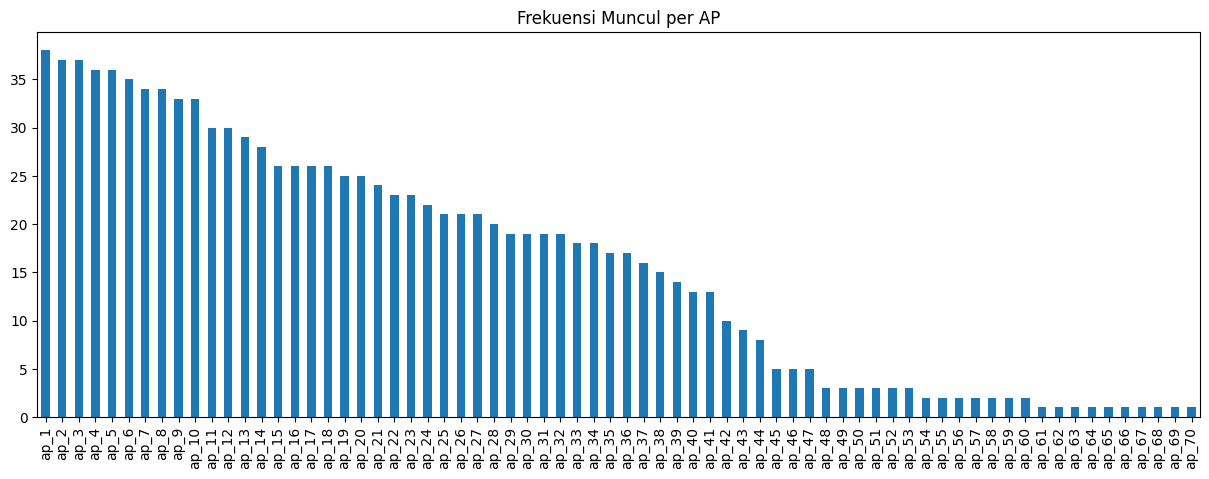

In [3]:
ap_cols = [col for col in df.columns if col.startswith('ap_')]
df_ap = df[ap_cols]

# Hitung berapa banyak nilai non-NaN per kolom
non_nan_count = df_ap.count().sort_values(ascending=False)

# Visualisasi
non_nan_count.plot(kind='bar', figsize=(15,5), title='Frekuensi Muncul per AP')


In [4]:
threshold = len(df) * 0.10  # 10%
selected_ap = non_nan_count[non_nan_count >= threshold].index.tolist()

df_filtered = df[selected_ap + ['spot']]
print(f"Jumlah AP setelah filtering: {len(selected_ap)}")
df_filtered.to_csv('Dataset_Model_Preprocessed.csv', index=False)

Jumlah AP setelah filtering: 43


Untuk menghindari noise dan mengurangi risiko overfitting pada tahap pemodelan, Access Point yang frekuensi kemunculannya kurang dari 10% dari total data akan dihapus (tidak digunakan) dari dataset. Karena kemungkinan access point tersebut berada di luar area gedung Upatik dan Perpustakaan, tetapi secara kebetulan tertangkap selama proses pemetaan access point.

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("../Dataset_Model_Preprocessed.csv")

# Ambil semua kolom fitur (exclude 'spot')
feature_names = df.drop(columns=['spot']).columns.tolist()

# Simpan ke CSV
pd.DataFrame({'feature': feature_names}).to_csv('features_used.csv', index=False)

print("✅ File 'features_used.csv' berhasil dibuat.")


✅ File 'features_used.csv' berhasil dibuat.
